In [1]:
import numpy as np
import os
from tensorflow import keras
# from keras.callbacks import EarlyStopping
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt

In [2]:
%cd /Users/Kunal/Projects/TCH_CardiacSignals_F20/

/Users/kunal/Projects/TCH_CardiacSignals_F20


In [3]:
file_index = "1"
data = np.load(os.path.join("Working_Data", "Normalized_Fixed_Dim_HBs_Idx" + file_index + ".npy"))



    # reconstruction_save = os.path.join("Working_Data", "reconstructed_ae_" + str(encoding_dim) + "d_Idx" + str(file_index) + ".npy")
    # encoded_save = os.path.join("Working_Data", "reduced_vae_" + str(encoding_dim) + "d_Idx" + str(file_index) + ".npy")
    # np.save(reconstruction_save, all_leads_reconstructed)
    # np.save(encoded_save,all_leads_encoded)

In [36]:
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, InputLayer, Dropout
from tensorflow.keras.models import Sequential, Model

def build_autoencoder(sig_shape, encode_size):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(sig_shape))
    encoder.add(Flatten())
    # encoder.add(Dense(350, activation = 'tanh'))
    encoder.add(Dense(200, activation = 'tanh', kernel_initializer='normal'))
    # encoder.add(Dropout(0.2))
    encoder.add(Dense(100, activation = 'tanh', kernel_initializer='normal'))
    encoder.add(Dense(25, activation = 'tanh', kernel_initializer='normal'))
    encoder.add(Dense(encode_size))

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((encode_size,)))
    decoder.add(Dense(25, activation = 'tanh',kernel_initializer='normal'))
    decoder.add(Dense(100, activation = 'tanh',kernel_initializer='normal'))
    decoder.add(Dense(200, activation = 'tanh',kernel_initializer='normal'))
    # decoder.add(Dense(350, activation = 'tanh'))
    decoder.add(Dense(np.prod(sig_shape), activation = 'linear')) # np.prod(img_shape) is the same as 32*32*3, it's more generic than saying 3072
    decoder.add(Reshape(sig_shape))

    return encoder, decoder

In [37]:
# Same as (32,32,3), we neglect the number of instances from shape
signal_shape = data.shape[1:]
encoder, decoder = build_autoencoder(signal_shape, 1)

inp = Input(signal_shape)
encode = encoder(inp)
reconstruction = decoder(encode)

autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adam', loss='mse')

print(autoencoder.summary())

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        [(None, 100, 4)]          0         
_________________________________________________________________
sequential_22 (Sequential)   (None, 1)                 102851    
_________________________________________________________________
sequential_23 (Sequential)   (None, 100, 4)            103250    
Total params: 206,101
Trainable params: 206,101
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
mod = autoencoder.fit(x=data, y=data, epochs=30)

Epoch 1/30
1449/1449 [==============================] - 3s 2ms/step - loss: 0.1289

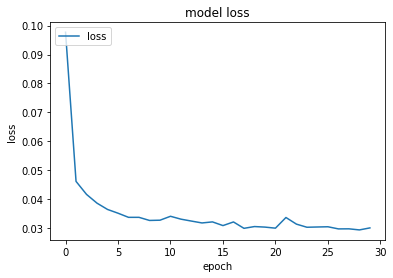

In [35]:
plt.plot(mod.history['loss'])
# plt.plot(mod.history['reconstruction_loss'])
# plt.plot(history.history['kl_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

In [42]:
# reconstruction = decoder.predict(data)
encoded = encoder.predict(data)
reconstruction = decoder.predict(encoded)

Text(0.5, 1.0, 'Reconstructed Data')

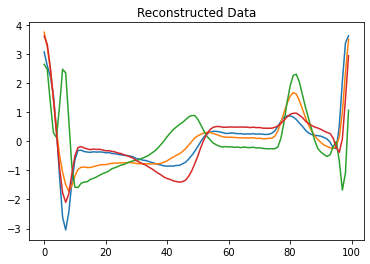

In [46]:
plt.plot(reconstruction[1])
plt.title("Reconstructed Data")

Text(0.5, 1.0, 'Original Data')

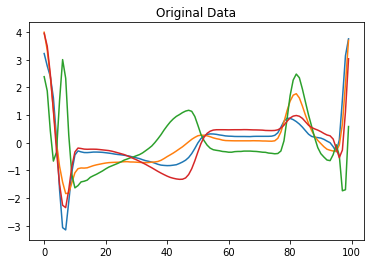

In [47]:
plt.plot(data[1])
plt.title("Original Data")